# **Selección de Características**

[Victor Sanchez](https://github.com/VicoSan07) <br>
Dataset: [Wine Quality](https://archive.ics.uci.edu/ml/datasets/wine+quality) 

### **Objetivo**

Utilizar y analizar los resultados obtenidos a tráves de distintos métodos de selección de características con el fin de resguardar las variables más significativas para los modelos posteriores a trabajar. **No siempre más es mejor**

### **Carga de Dataset**

In [71]:
import pandas as pd

#Carga de dataset 'vino rojo' 
dfwiner = pd.read_csv(r'C:/Users/vicos/Documents/winequality-red.csv',delimiter=";",
                      #Tipo de datos en cada columna
                      dtype={
                          'fixed acidity': float,
                          'volatile acidity': float,
                          'citric acid': float,
                          'residual sugar': float,
                          'chlorides': float,
                          'free sulfur dioxide': float,
                          'total sulfur dioxide': float,
                          'density': float,
                          'pH': float,
                          'sulphates': float,
                          'alcohol': float,
                          'quality': int,
                      })

In [11]:
#Librerías a utilizar
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [72]:
# Renombramos los nombres de las variables para facilitar su representación visual
dfwiner.rename(
    columns={"fixed acidity": "FA",
            "volatile acidity": "VA",
             "citric acid": "CA",
             "residual sugar": "RS",
             "chlorides": "CH",
             "free sulfur dioxide": "FSD",
             "total sulfur dioxide": "TSD",
             "density": "DE",
             "pH": "PH",
             "sulphates": "SU",
             "alcohol": "AL",
             "quality": "QU"},
    inplace=True,
)

### **Variable de interés**

De la base de datos a analizar, nuestra variable de interés corresponde a la calidad de alcohol, una indicador cuyo rango de valores corresponde de 0 a 10

In [73]:
# Variable de intéres y resto de variables
y = dfwiner[['QU']]
x = dfwiner[['FA','VA','CA','RS','CH','FSD','TSD','DE','PH','SU','AL']]
x

,FA,VA,CA,RS,CH,FSD,TSD,DE,PH,SU,AL
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


### **Umbral de Varianza**
También conocido como _Variance Threshold_ por su nombre en inglés, es un método que mide qué tan lejos está un conjunto de números de su valor promedio. Una varianza cercana a cero podría indicar un valor casi constante o con muy ligera variación, por lo que se asume también que tendría un bajo poder predictivo.

Para poder trabajar este método es necesario normalizar los datos, con el objetivo de que las varianzas sean comparables ante una misma escala.

In [74]:
# Normalización de variables
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(x)
x_normalized = pd.DataFrame(scaled, columns = x.columns)
x_normalized

,FA,VA,CA,RS,CH,FSD,TSD,DE,PH,SU,AL
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.149701,0.323077
1595,0.115044,0.294521,0.10,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.257485,0.430769
1596,0.150442,0.267123,0.13,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.251497,0.400000
1597,0.115044,0.359589,0.12,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.227545,0.276923


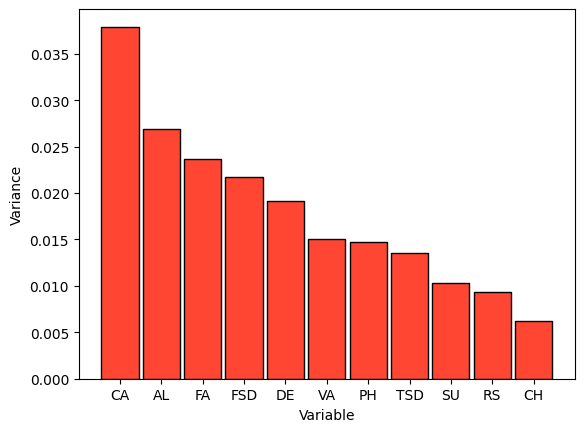

In [103]:
from sklearn.feature_selection import VarianceThreshold

# Cálculo de varianzas
selector = VarianceThreshold()
selector.fit_transform(x_normalized)
selector.variances_

# Dataframe de resultados
dfresults = pd.DataFrame(selector.variances_, index=x.columns)
dfresults.columns = ['variance']
dfresults.sort_values('variance', inplace = True, ascending = False)
dfresults

#Gráfico 
plt.figure()
plt.bar(dfresults.index, dfresults.variance, width= 0.9, align='center',color='#FF4633', edgecolor = 'black')
plt.xlabel('Variable')
plt.ylabel('Variance')
plt.show()

Del gráfico anterior podemos observar que el top 3 de variables con menor varianza son: "Chlorides", "Residual Sugar" y "Sulphates". Cabe destacar que para darle honor al nombre del método, es necesario definir un umbral de aceptación para las variables. Por más que busque literatura no encontré ninguna cita arbitrada como referente de un nivel mínimo

### **Correlación de Pearson**

Aunado al método anterior, existen otros filtros de variables como lo es el correspondiente a la Correlación de Pearson, el cual selecciona variables en función de esta métrica, ya que la misma mide el grado de relación lineal entre dos variables, seleccionandose aquellas con mayor correlación.

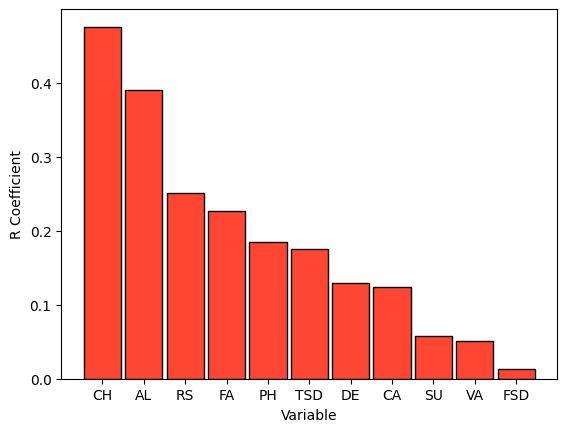

In [104]:
from sklearn.feature_selection import r_regression

r_pearson = r_regression(x, y.values.ravel())
r_pearson
dfresults['r_pearson'] = r_pearson
dfresults['r_pearson_abs'] = dfresults['r_pearson'].abs()
dfresults.sort_values('r_pearson_abs', inplace = True, ascending = False)

plt.figure()
plt.bar(dfresults.index, dfresults.r_pearson_abs, width= 0.9, align='center',color='#FF4633', edgecolor = 'black')
plt.xlabel('Variable')
plt.ylabel('R Coefficient')
plt.show()

### **Estadístico de Fisher**

Finalmente utilicemos el estadístico Fisher, adecuado en nuestra base al tener variables continuas, caso contrario, se recomienda utilizar Chi-cuadrada.

In [ ]:
from sklearn.feature_selection import f_regression

f_value = f_regression(x, y.values.ravel())

pass_test = []
not_pass_test = []
alpha = 0.05
for i in range(len(f_value[1])):
    print(x.columns[i], f_value[1][i])
    if f_value[1][i] < alpha:
        pass_test.append(x.columns[i])
    else:
        not_pass_test.append(x.columns[i])

dfresults['f_value'] = f_value[0]
dfresults.sort_values('f_value', inplace = True, ascending = False)

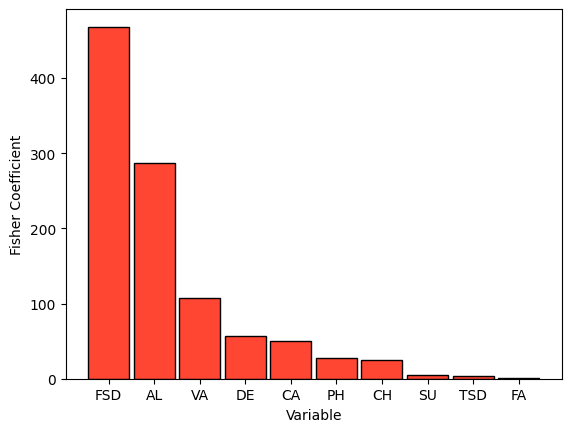

In [106]:
plt.figure()
plt.bar(dfresults.drop(not_pass_test).index, dfresults.drop(not_pass_test).f_value, width= 0.9, align='center',color='#FF4633', edgecolor = 'black')
plt.xlabel('Variable')
plt.ylabel('Fisher Coefficient')
plt.show()

### **Método Lasso**

El Método Lasso, por sus siglas en inglés: Least Absolute Shrinkage and Selection Operator, es un método que combina un modelo de regresión con un procedimiento de contracción de algunos parámetros hacia cero y selección de variables, imponiendo una restricción o una penalización sobre los coeficientes de regresión [(Ramos, 2018)](https://idus.us.es/bitstream/handle/11441/77576/Ramos%20Castillo%20Laura%20TFG.pdf?sequence=1&isAllowed=y). A diferencia de los métodos anteriores que hemos visto, esté método sí cuenta con un criterio de selección definido universalmente.

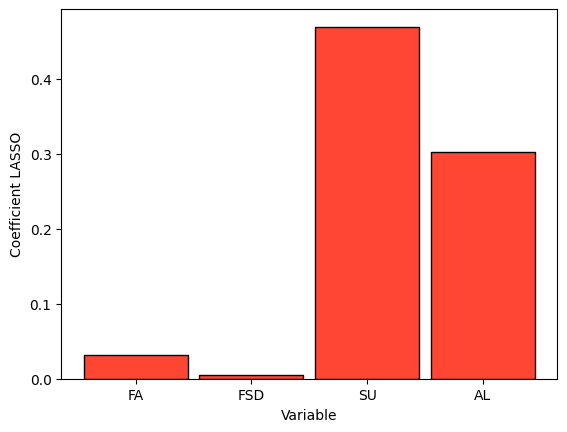

In [102]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

regpen = LassoCV()
regpen.fit(x, y.values.ravel())

coef_reg = pd.Series(regpen.coef_, index = x.columns)
coef_reg = coef_reg[coef_reg>0]

plt.figure()
plt.bar(coef_reg.index, coef_reg, width= 0.9, align='center',color='#FF4633', edgecolor = 'black')
plt.xlabel('Variable')
plt.ylabel('Coefficient LASSO')
plt.show()

Podemos observar como a tráves del método LASSO, solamente se conservan con las siguientes variables: "fixed acidity", "free sulfure dioxide", "sulphates" y "alcohol". Que en conjunto, con los resultados de los 3 primeros métodos que revisamos ...

In [107]:
dfresults

,variance,r_pearson,r_pearson_abs,f_value
FSD,0.021691,0.013732,0.013732,468.267011
AL,0.026862,-0.390558,0.390558,287.444450
VA,0.015032,-0.050656,0.050656,107.740433
RS,0.009320,0.251397,0.251397,86.257726
DE,0.019190,-0.128907,0.128907,56.657818
CA,0.037924,0.124052,0.124052,50.405223
PH,0.014769,-0.185100,0.185100,26.985608
CH,0.006170,0.476166,0.476166,24.960038
SU,0.010296,-0.057731,0.057731,5.340462
TSD,0.013503,-0.174919,0.174919,4.108502


### **Características más relevantes**

Se pueden definir las características más relevantes, en base a los siguientes criterios:

- Alcohol: Dentro del top 3 variables más relevantes para cada uno de los métodos revisados.
- Fixed Acidity: Dentro del top 4 variables más relevantes para cada uno de los métodos revisados, a excepción del estadístico de Fisher.
- Free Sulfure Dioxide: Desempeño mixto pero mejor que varias variables
- Sulphates: Desempeño mixto, inclusive se tienen variables con un mejor desempeño, pero la clave está en la baja correlación que tiene con el resto de las variables, de la matriz de correlación ya [previamente analizada](https://github.com/VicoSan07/AprendizajeAutomatico/blob/main/Tarea03_AA_2023.ipynb)


### **Justificación**

Dentro de la base podremos encontrar subgrupos de variables, los cuales tienen características en común, ya sea en forma de complemento una de otra, _total sulfure dioxide_ y _free sulfure dioxide_, o subconjuntos unas de otras, _citric acid_ y _fixed acid_.
Es por ello que la selección de estas 4 variables las considero adecuadas teniendo en cuenta que se están seleccionando alrededor de una variable por grupo, mismas que además salieron medianamente o superiormente bien parados de los métodos que analizamos hasta el momento.

Adicionalmente, estos 4 elementos a grandes rasgos considero que componen el sabor y posiblemente por ende, la calidad de un vino. Desde el porcentaje de alcohol que tienen hasta el sabor que les es brindado por su concentración de ácidos, así como finalmente su conservación gracias a los sulfatos y el dióxido de azufre.